# Predicting Players Rating


**Problem Statement**: The ultimate Soccer database for data analysis and machine learning The dataset comes in the form of an SQL database and contains statistics of about 25,000 football matches, from the top football league of 11 European Countries. It covers seasons from 2008 to 2016 and contains match statistics (i.e: scores, corners, fouls etc...) as well as the team formations, with player names and a pair of coordinates to indicate their position on the pitch.

* +25,000 matches
* +10,000 players
* 11 European Countries with their lead championship
* Seasons 2008 to 2016
* Players and Teams' attributes* sourced from EA Sports' FIFA video game series, including the weekly updates
* Team line up with squad formation (X, Y coordinates)
* Betting odds from up to 10 providers
* Detailed match events (goal types, possession, corner, cross, fouls, cards etc...) for +10,000 matches The dataset also has a set of about 35 statistics for each player, derived from EA Sports' FIFA video games. It is not just the stats that come with a new version of the game but also the weekly updates. So for instance if a player has performed poorly over a period of time and his stats get impacted in FIFA, you would normally see the same in the dataset.

**Object:** predict the overall rating of soccer player based on their attributes such as 'crossing', 'finishing etc.

In [1]:
import sqlite3  # for Database connection and database object access 
import pandas as pd # for Dataframe and it's related opeartion on Basketball data
import numpy as np # for numerical operations on Basketball data
import matplotlib.pyplot as plt # for graphical representation of data
import seaborn as sns #  for graphical representation of data
import math  # for mathematical operations

In [2]:
%matplotlib inline

In [3]:
# sklearn for regression analysis and model evaluation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for splitting of data into train and test
from sklearn import metrics
from sklearn.metrics import mean_squared_error , r2_score  # for evaluation of model

In [4]:
# connect to database imported form kaggle website
connection = sqlite3.connect(r'C:\Users\Aeon\Downloads\database.sqlite')

In [5]:

# read_sql_query for fetching data from sql database; 
# Player_Attributes : table in database for soccer data

df = pd.read_sql_query("SELECT * FROM Player_Attributes" , connection) 
print("Samples of data are ( first 5 rows)")
df.head()

Samples of data are ( first 5 rows)


,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [6]:
# Shape Of Data
print("The Structure of data",df.shape)

#print("The No. of rows in data : {0}\nThe No. of columns in data : {1}".format(df_BasketBall.shape[0],df_BasketBall.shape[1]))

The Structure of data (183978, 42)


In [7]:
columns_data = df.columns.tolist()
print("Columns in the dataset are: \n")
print(columns_data)

Columns in the dataset are: 

['id', 'player_fifa_api_id', 'player_api_id', 'date', 'overall_rating', 'potential', 'preferred_foot', 'attacking_work_rate', 'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy', 'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy', 'long_passing', 'ball_control', 'acceleration', 'sprint_speed', 'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina', 'strength', 'long_shots', 'aggression', 'interceptions', 'positioning', 'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle', 'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning', 'gk_reflexes']


In [8]:
# Check whether dataset contains any duplicated value

print("Check if the dataset has duplicate value")
df.duplicated().any()


Check if the dataset has duplicate value


False

In [9]:
#check for null values
df.isnull().sum()


id                        0
player_fifa_api_id        0
player_api_id             0
date                      0
overall_rating          836
potential               836
preferred_foot          836
attacking_work_rate    3230
defensive_work_rate     836
crossing                836
finishing               836
heading_accuracy        836
short_passing           836
volleys                2713
dribbling               836
curve                  2713
free_kick_accuracy      836
long_passing            836
ball_control            836
acceleration            836
sprint_speed            836
agility                2713
reactions               836
balance                2713
shot_power              836
jumping                2713
stamina                 836
strength                836
long_shots              836
aggression              836
interceptions           836
positioning             836
vision                 2713
penalties               836
marking                 836
standing_tackle     

In [10]:
# Null Rows analysis in  data
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df.isnull().sum(),'No.of rows': df.count(), 'percent_missing': percent_missing})
print("The Null/NA missing Data in the dataset are : \n")   
missing_value_df.sort_values('percent_missing')

The Null/NA missing Data in the dataset are : 



,column_name,No. Of Missing rows,No.of rows,percent_missing
id,id,0,183978,0.000000
player_fifa_api_id,player_fifa_api_id,0,183978,0.000000
player_api_id,player_api_id,0,183978,0.000000
date,date,0,183978,0.000000
shot_power,shot_power,836,183142,0.454402
stamina,stamina,836,183142,0.454402
strength,strength,836,183142,0.454402
long_shots,long_shots,836,183142,0.454402
aggression,aggression,836,183142,0.454402
interceptions,interceptions,836,183142,0.454402


In [11]:
# Replacing Null/NA values with their mean for features having interger or float datatype

for col in df.select_dtypes(['int64','float64']):
    df[col] = df[col].fillna((df[col].mean()))

In [12]:
# Null Rows analysis in Basketball data
columns = df.columns
percent_missing = df.isnull().sum() * 100 / len(df)

missing_value_df = pd.DataFrame({'column_name': columns,'No. Of Missing rows':df.isnull().sum(), 'No.of rows': df.count(), 'percent_missing': percent_missing}
                               )
print("The Null/NA missing Data in the dataset are : \n")   
missing_value_df.sort_values('percent_missing')

The Null/NA missing Data in the dataset are : 



,column_name,No. Of Missing rows,No.of rows,percent_missing
id,id,0,183978,0.000000
balance,balance,0,183978,0.000000
shot_power,shot_power,0,183978,0.000000
jumping,jumping,0,183978,0.000000
stamina,stamina,0,183978,0.000000
strength,strength,0,183978,0.000000
long_shots,long_shots,0,183978,0.000000
aggression,aggression,0,183978,0.000000
interceptions,interceptions,0,183978,0.000000
positioning,positioning,0,183978,0.000000


In [13]:
# Drop NA Values
df.dropna(axis=0, inplace=True)

In [14]:
#check for null values
df.isnull().sum()

id                     0
player_fifa_api_id     0
player_api_id          0
date                   0
overall_rating         0
potential              0
preferred_foot         0
attacking_work_rate    0
defensive_work_rate    0
crossing               0
finishing              0
heading_accuracy       0
short_passing          0
volleys                0
dribbling              0
curve                  0
free_kick_accuracy     0
long_passing           0
ball_control           0
acceleration           0
sprint_speed           0
agility                0
reactions              0
balance                0
shot_power             0
jumping                0
stamina                0
strength               0
long_shots             0
aggression             0
interceptions          0
positioning            0
vision                 0
penalties              0
marking                0
standing_tackle        0
sliding_tackle         0
gk_diving              0
gk_handling            0
gk_kicking             0


In [15]:
# Statistical analysis of data
df.describe()

,id,player_fifa_api_id,player_api_id,overall_rating,potential,crossing,finishing,heading_accuracy,short_passing,volleys,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,...,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.00000,180748.000000,180748.000000,180748.000000
mean,92007.255062,166675.834925,137451.730780,68.631166,73.476730,55.134397,49.957178,57.265956,62.482124,49.488883,...,57.868188,54.947972,46.765668,50.360906,48.029282,14.695930,15.96509,20.606978,16.031995,16.342195
std,53096.865278,52961.391212,137527.048463,7.029702,6.583553,17.246558,19.038535,16.478497,14.172483,18.232415,...,15.135884,15.552900,21.224954,21.492330,21.569283,16.842394,15.84191,21.199768,16.070450,17.184708
min,1.000000,2.000000,2625.000000,33.000000,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,46076.750000,156519.000000,35438.000000,64.000000,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.00000,8.000000,8.000000,8.000000
50%,92026.500000,183740.000000,80126.000000,69.000000,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.00000,12.000000,11.000000,11.000000
75%,137966.250000,200111.000000,192771.250000,73.000000,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.00000,15.000000,15.000000,15.000000
max,183978.000000,234141.000000,750584.000000,94.000000,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.00000,97.000000,96.000000,96.000000


In [16]:
# Selection of Independent and Dependent features ( columns ) form Basketball data
df.head()

,id,player_fifa_api_id,player_api_id,date,overall_rating,potential,preferred_foot,attacking_work_rate,defensive_work_rate,crossing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
0,1,218353,505942,2016-02-18 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
1,2,218353,505942,2015-11-19 00:00:00,67.0,71.0,right,medium,medium,49.0,...,54.0,48.0,65.0,69.0,69.0,6.0,11.0,10.0,8.0,8.0
2,3,218353,505942,2015-09-21 00:00:00,62.0,66.0,right,medium,medium,49.0,...,54.0,48.0,65.0,66.0,69.0,6.0,11.0,10.0,8.0,8.0
3,4,218353,505942,2015-03-20 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0
4,5,218353,505942,2007-02-22 00:00:00,61.0,65.0,right,medium,medium,48.0,...,53.0,47.0,62.0,63.0,66.0,5.0,10.0,9.0,7.0,7.0


In [17]:
#  Independent features from the dataset
df_Features = df.columns[5:]
df_Features

Index(['potential', 'preferred_foot', 'attacking_work_rate',
       'defensive_work_rate', 'crossing', 'finishing', 'heading_accuracy',
       'short_passing', 'volleys', 'dribbling', 'curve', 'free_kick_accuracy',
       'long_passing', 'ball_control', 'acceleration', 'sprint_speed',
       'agility', 'reactions', 'balance', 'shot_power', 'jumping', 'stamina',
       'strength', 'long_shots', 'aggression', 'interceptions', 'positioning',
       'vision', 'penalties', 'marking', 'standing_tackle', 'sliding_tackle',
       'gk_diving', 'gk_handling', 'gk_kicking', 'gk_positioning',
       'gk_reflexes'],
      dtype='object')

In [18]:
# Selection Of Dependent/Target Variable from dataset
df_target = df[df.columns[4]]
df_target.head()

0    67.0
1    67.0
2    62.0
3    61.0
4    61.0
Name: overall_rating, dtype: float64

In [19]:
# Statistical observation of Features data frame
df_Features = df[df.columns[5:]]
df_Features.describe()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,vision,penalties,marking,standing_tackle,sliding_tackle,gk_diving,gk_handling,gk_kicking,gk_positioning,gk_reflexes
count,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,...,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.000000,180748.00000,180748.000000,180748.000000,180748.000000
mean,73.476730,55.134397,49.957178,57.265956,62.482124,49.488883,59.253231,53.001330,49.395678,57.085561,...,57.868188,54.947972,46.765668,50.360906,48.029282,14.695930,15.96509,20.606978,16.031995,16.342195
std,6.583553,17.246558,19.038535,16.478497,14.172483,18.232415,17.740268,18.225579,17.820702,14.408869,...,15.135884,15.552900,21.224954,21.492330,21.569283,16.842394,15.84191,21.199768,16.070450,17.184708
min,39.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,2.000000,1.000000,3.000000,...,1.000000,2.000000,1.000000,1.000000,2.000000,1.000000,1.00000,1.000000,1.000000,1.000000
25%,69.000000,45.000000,34.000000,49.000000,57.000000,35.000000,52.000000,41.000000,36.000000,49.000000,...,49.000000,45.000000,25.000000,29.000000,25.000000,7.000000,8.00000,8.000000,8.000000,8.000000
50%,74.000000,59.000000,53.000000,60.000000,65.000000,52.000000,64.000000,56.000000,50.000000,59.000000,...,60.000000,57.000000,50.000000,56.000000,53.000000,10.000000,11.00000,12.000000,11.000000,11.000000
75%,78.000000,68.000000,65.000000,68.000000,72.000000,64.000000,72.000000,67.000000,63.000000,67.000000,...,69.000000,67.000000,66.000000,69.000000,67.000000,13.000000,15.00000,15.000000,15.000000,15.000000
max,97.000000,95.000000,97.000000,98.000000,97.000000,93.000000,97.000000,94.000000,97.000000,97.000000,...,97.000000,96.000000,94.000000,95.000000,95.000000,94.000000,93.00000,97.000000,96.000000,96.000000


In [20]:
# Statisticl observation of Overall_reating variable
df_target.describe()

count    180748.000000
mean         68.631166
std           7.029702
min          33.000000
25%          64.000000
50%          69.000000
75%          73.000000
max          94.000000
Name: overall_rating, dtype: float64

In [21]:
# Unique values in "preferred_foot " features of Feature dataframe
df_Features['preferred_foot'].unique()

array(['right', 'left'], dtype=object)

In [22]:
df_preferred_foot_dummies= pd.get_dummies(df_Features['preferred_foot'],prefix='preferred_foot').iloc[:, 1:]
print("Data after dummies from preferred_foot feature ")
df_preferred_foot_dummies.head(10)

Data after dummies from preferred_foot feature 


,preferred_foot_right
0,1
1,1
2,1
3,1
4,1
5,0
6,0
7,0
8,0
9,0


In [23]:
# Unique values in "attacking_work_rate" features of Feature dataframe
df_Features['attacking_work_rate'].unique()


array(['medium', 'high', 'low', 'None', 'le', 'norm', 'stoc', 'y'],
      dtype=object)

In [24]:
df_attacking_work_rate_dummies= pd.get_dummies(df_Features['attacking_work_rate'],prefix='attacking_work_rate').iloc[:,1:]
print("Data after dummies from attacking_work_rate feature ")
df_attacking_work_rate_dummies.head()


Data after dummies from attacking_work_rate feature 


,attacking_work_rate_high,attacking_work_rate_le,attacking_work_rate_low,attacking_work_rate_medium,attacking_work_rate_norm,attacking_work_rate_stoc,attacking_work_rate_y
0,0,0,0,1,0,0,0
1,0,0,0,1,0,0,0
2,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,1,0,0,0


In [25]:
# Unique values in "defensive_work_rate" features of Feature dataframe
df_Features['defensive_work_rate'].unique()


array(['medium', 'high', 'low', '5', 'ean', 'o', '1', 'ormal', '7', '2',
       '8', '4', 'tocky', '0', '3', '6', '9', 'es'], dtype=object)

In [26]:
df_defensive_work_rate_dummies= pd.get_dummies(df_Features['defensive_work_rate'],prefix='defensive_work_rate').iloc[:,1:]
print("Data after dummies from defensive_work_rate feature ")
df_defensive_work_rate_dummies.head()

Data after dummies from defensive_work_rate feature 


,defensive_work_rate_1,defensive_work_rate_2,defensive_work_rate_3,defensive_work_rate_4,defensive_work_rate_5,defensive_work_rate_6,defensive_work_rate_7,defensive_work_rate_8,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky
0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


Thus we have created dummy variables from " preferred_foot,attacking_work_rate ,defensive_work_rate " features from Features Dataframe. Thus drop these varibale form existing dataframe and appned dummies vaiables in place of them.



In [27]:
# remove the categorical columns " preferred_foot","attacking_work_rate ","defensive_work_rate "
cols_to_drop=['preferred_foot','attacking_work_rate','defensive_work_rate']
df_Features =df_Features.drop(columns=cols_to_drop, axis=1)

In [28]:
# Conacat / add dummies variable into Features data frame
df_Features = pd.concat([df_Features, df_attacking_work_rate_dummies,df_defensive_work_rate_dummies ,df_preferred_foot_dummies], axis=1)
df_Features.head()

,potential,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,free_kick_accuracy,long_passing,...,defensive_work_rate_9,defensive_work_rate_ean,defensive_work_rate_es,defensive_work_rate_high,defensive_work_rate_low,defensive_work_rate_medium,defensive_work_rate_o,defensive_work_rate_ormal,defensive_work_rate_tocky,preferred_foot_right
0,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,1,0,0,0,1
1,71.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,1,0,0,0,1
2,66.0,49.0,44.0,71.0,61.0,44.0,51.0,45.0,39.0,64.0,...,0,0,0,0,0,1,0,0,0,1
3,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,0,1,0,0,0,1
4,65.0,48.0,43.0,70.0,60.0,43.0,50.0,44.0,38.0,63.0,...,0,0,0,0,0,1,0,0,0,1


In [29]:
df_Features.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 180748 entries, 0 to 183977
Data columns (total 59 columns):
potential                     180748 non-null float64
crossing                      180748 non-null float64
finishing                     180748 non-null float64
heading_accuracy              180748 non-null float64
short_passing                 180748 non-null float64
volleys                       180748 non-null float64
dribbling                     180748 non-null float64
curve                         180748 non-null float64
free_kick_accuracy            180748 non-null float64
long_passing                  180748 non-null float64
ball_control                  180748 non-null float64
acceleration                  180748 non-null float64
sprint_speed                  180748 non-null float64
agility                       180748 non-null float64
reactions                     180748 non-null float64
balance                       180748 non-null float64
shot_power               

Distribution of Individual features in feature datafarme


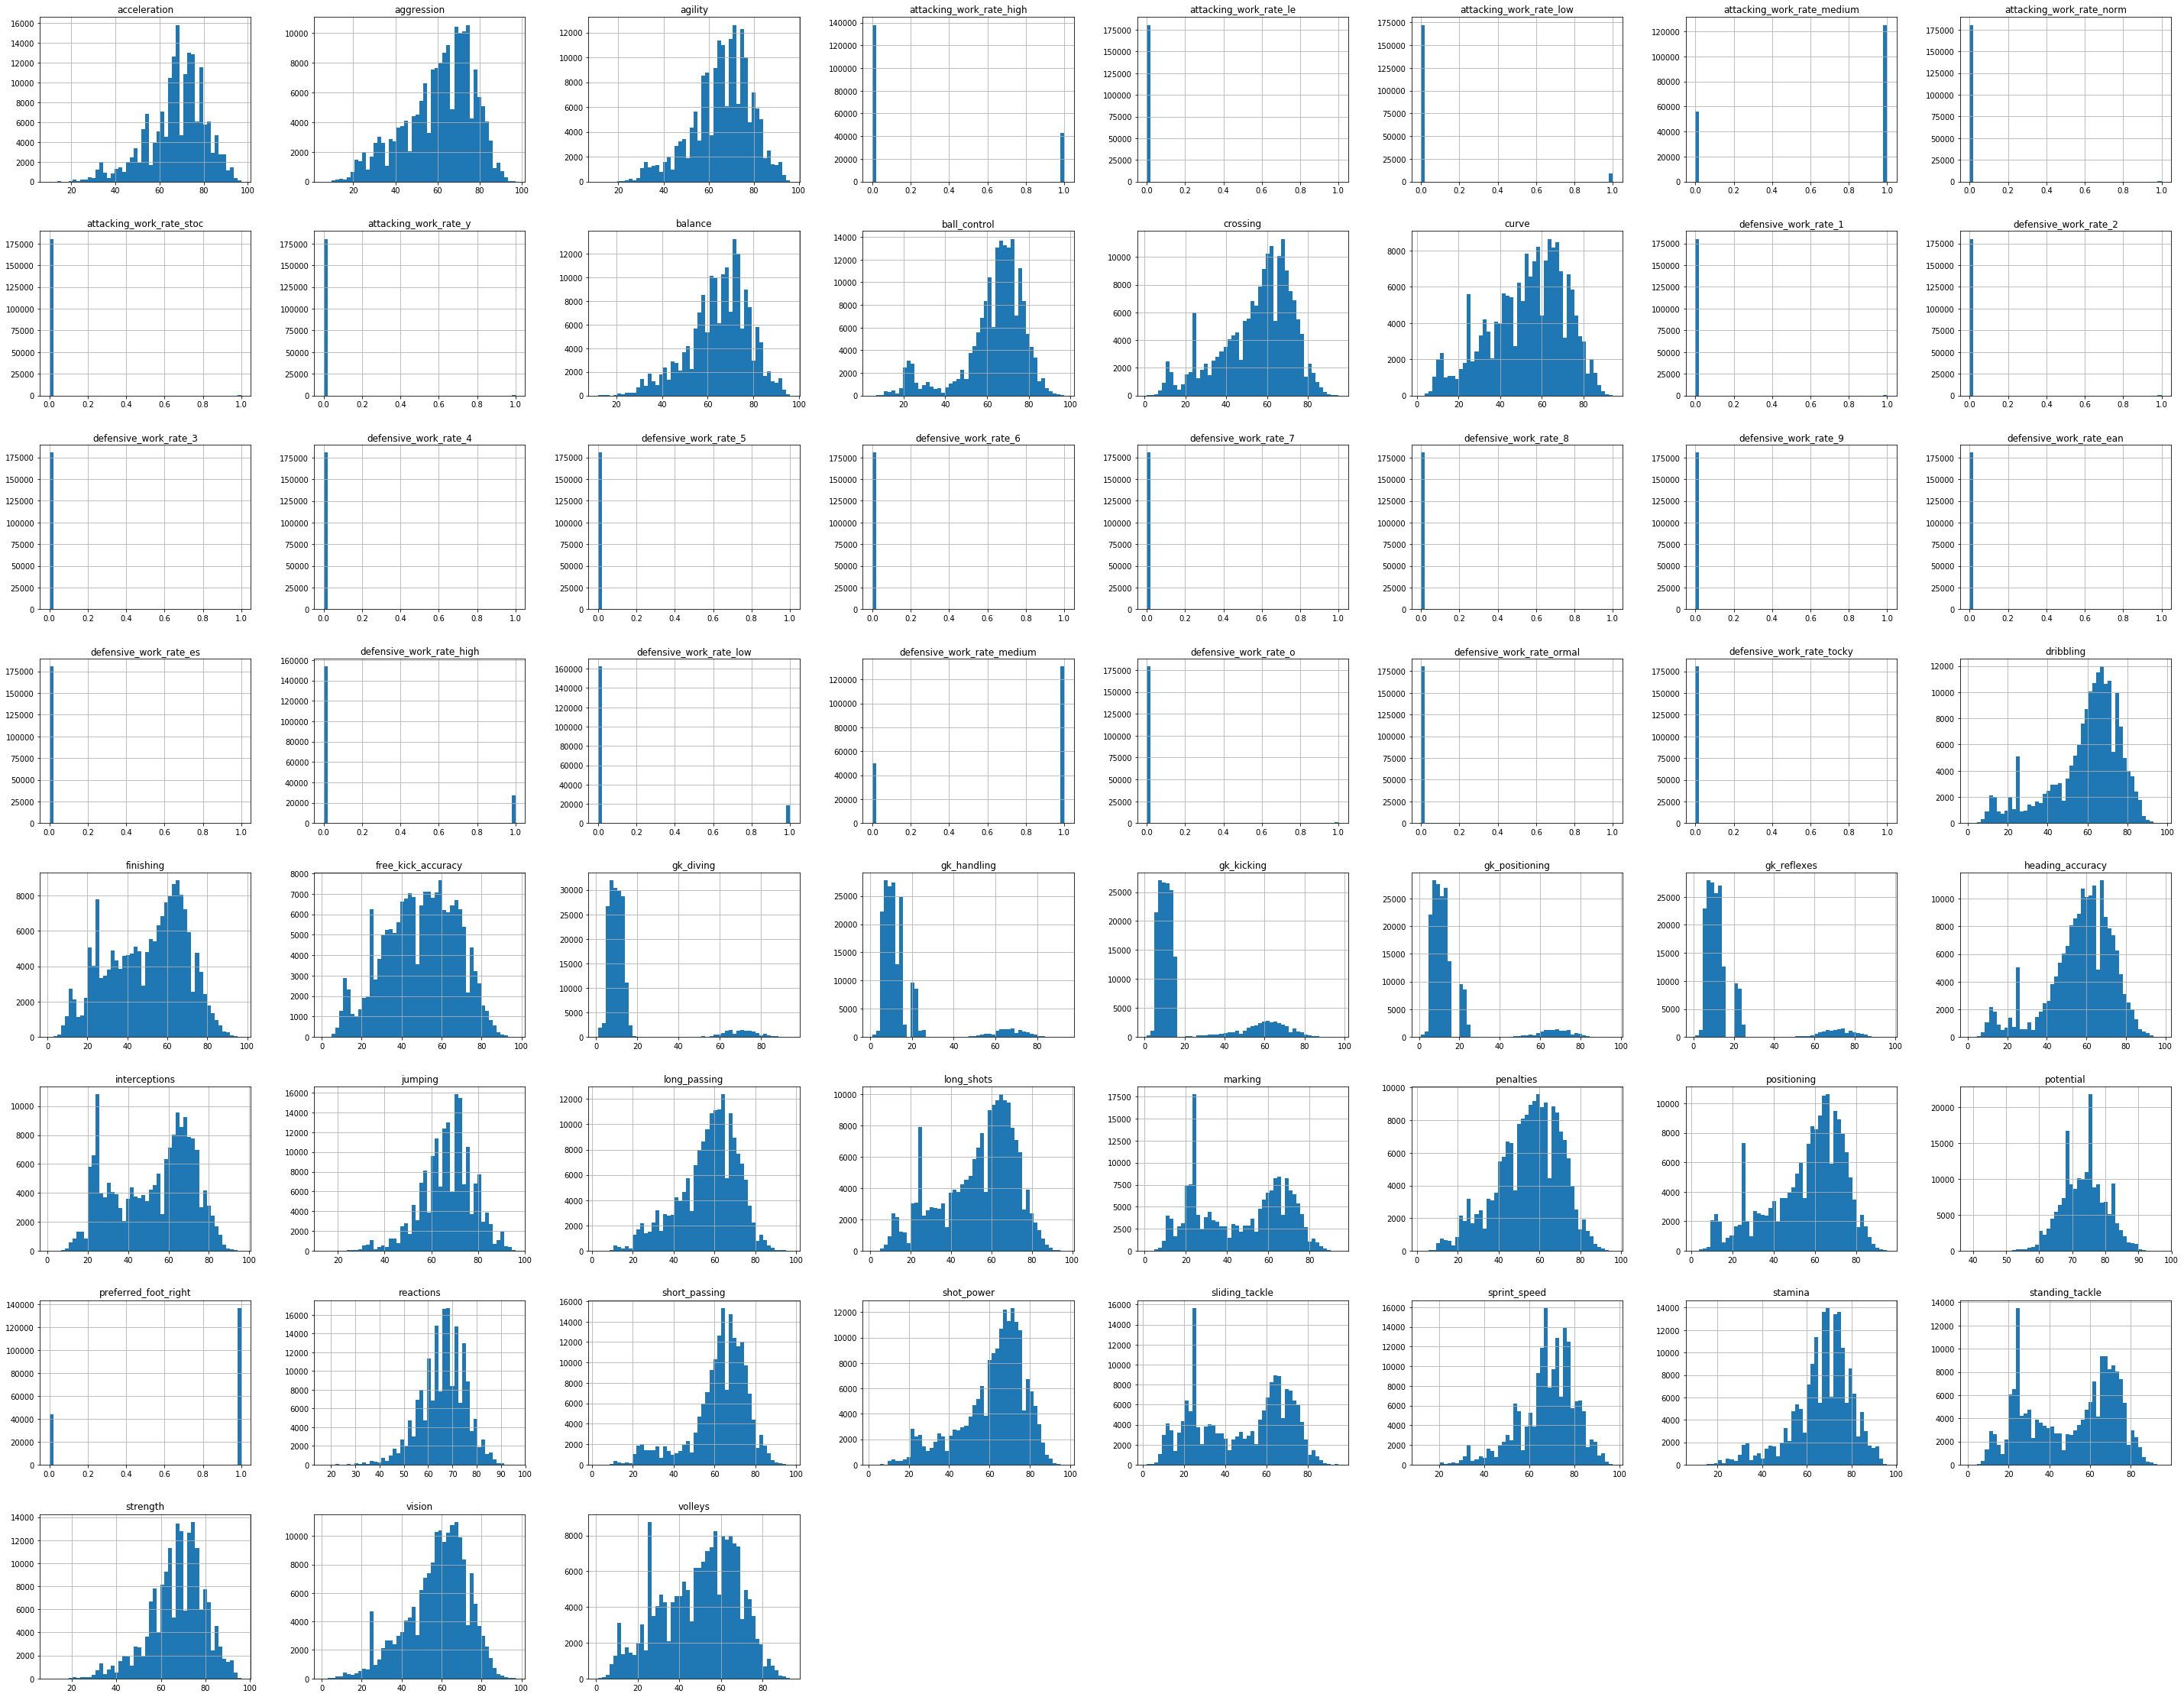

In [30]:
print("Distribution of Individual features in feature datafarme")
df_Features.hist(bins=50, figsize=(50,40))
plt.show()

Distribution of Target variable


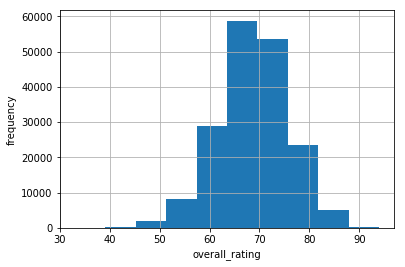

In [31]:
# Distribution of Overall rating
print("Distribution of Target variable")
df_target.hist()
plt.xlabel("overall_rating")
plt.ylabel("frequency")
plt.show()

In [32]:
# To split the Feature and target dataset into Train & Test dataset , import  train_test_split form sklearn.model_selection
from sklearn.model_selection import train_test_split

In [33]:
# We are selecting 80:20 ration for train and test dataset
# shuffle paramter for shuffling the datasets before splitting
X_train, X_test , y_train , y_test = train_test_split(df_Features , df_target , test_size=0.2 , random_state=25 , shuffle=True)


Few definitions related to Linear regression model 
* Coefficient of Determination (R square) : it explains the proportion of variation in the dependent variable that is explained by the independent variables. 
* Adjusted R square: Another parameter to explains the proportion of variation in the dependent variable based upon addition or removal of independent feature.adjusted R square will always be less than or equal to R square.



**Fitting regression model**



In [34]:
# Apply linear regression model between Tagret and and independent features using Training dataset
from sklearn.linear_model import LinearRegression
lm = LinearRegression()


In [35]:
# fitting of Target and Features
lm.fit(X_train, y_train)

# Calculation for Predicted overall rating based upon features training dataset
prediction = lm.predict(X_test)

In [36]:
print("The Predicted Overall rating based upon Features training dataset is (first 5 values):\n " ,prediction[0:5] )


The Predicted Overall rating based upon Features training dataset is (first 5 values):
  [69.58299682 65.88638336 74.40479617 67.1103409  69.02003386]


In [37]:
#printing the value of intercept and coefficient
print(lm.coef_)
print(lm.intercept_)

[ 3.75908572e-01  2.35282239e-02  1.18994026e-02  6.91710603e-02
  5.15022970e-02  3.03011115e-03 -1.05384081e-02  1.22870890e-02
  1.31037969e-02  6.29256374e-03  1.33193722e-01  4.97552547e-03
  1.07681272e-02 -8.24168081e-03  2.07115337e-01  7.59959182e-03
  1.65283877e-02  1.56172209e-02 -3.43194777e-03  5.92295621e-02
 -1.40020752e-02  1.97872840e-02  1.26053383e-02 -9.18106295e-03
 -1.91024536e-03  1.34079188e-02  3.22377454e-02  2.94546117e-03
 -2.65693222e-02  1.67683957e-01  3.39631670e-02 -3.47121517e-02
  5.73993868e-02  2.49174207e-02  4.25755409e-01 -4.56094105e-01
  1.72103098e+00  3.40782135e-01  1.54520250e-03 -5.55250088e-01
  1.76036945e-01  6.08010155e-01 -2.22987234e-01  6.12258414e-01
 -5.53465058e-01 -1.61549009e-01 -8.78952895e-03  7.16980060e-01
  1.04310822e+00  5.08759285e-01 -4.56094105e-01  1.76036945e-01
  3.51657456e-02  4.27319432e-01 -2.39066052e-01  2.38808214e-01
  1.54520250e-03 -5.55250088e-01  1.67080137e-02]
-3.7794546204404753


Text(0.5, 1.0, 'Overall Rating vs Predicted Rating')

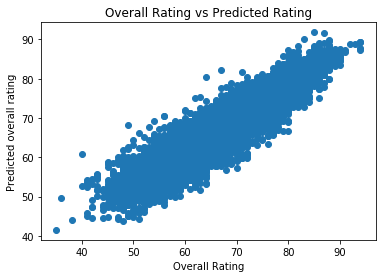

In [38]:
# plotting the graph between actual and predicted value
plt.scatter(y_test, prediction)
plt.xlabel("Overall Rating")
plt.ylabel("Predicted overall rating")
plt.title("Overall Rating vs Predicted Rating")


**Model Evaluation**

In [39]:
# Calculate the ordinary least square
import statsmodels.formula.api as smf
f1 = 'overall_rating ~ potential+preferred_foot+attacking_work_rate+defensive_work_rate+crossing+finishing+heading_accuracy+short_passing+volleys+dribbling+curve+free_kick_accuracy+long_passing+ball_control+acceleration+sprint_speed+agility+reactions+balance+shot_power+jumping+stamina+strength+long_shots+aggression+interceptions+positioning+vision+penalties+marking+standing_tackle+sliding_tackle+gk_diving+gk_handling+gk_kicking+gk_positioning+gk_reflexes'
lm = smf.ols(f1, data=df).fit()
lm.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         overall_rating   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                 1.781e+04
Date:                Fri, 29 Nov 2019   Prob (F-statistic):               0.00
Time:                        11:56:42   Log-Likelihood:            -4.4089e+05
No. Observations:              180748   AIC:                         8.819e+05
Df Residuals:                  180692   BIC:                         8.825e+05
Df Model:                          55                                         
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                        -3.6737      0.220    -16.711      0.000      -4.105      -3.243
preferred_foot[T.right]           0.0025      0.016      0.159      0.874      -0.028       0.033
attacking_work_rate[T.high]       0.2912      0.138      2.108      0.035       0.021       0.562
attacking_work_rate[T.le]        -0.4292      0.169     -2.547      0.011      -0.759      -0.099
attacking_work_rate[T.low]        1.5478      0.140     11.026      0.000       1.273       1.823
attacking_work_rate[T.medium]     0.1997      0.137      1.453      0.146      -0.070       0.469
attacking_work_rate[T.norm]       0.0036      0.124      0.029      0.977      -0.240       0.247
attacking_work_rate[T.stoc]      -0.6061      0.178     -3.414      0.001      -0.954      -0.258
attacking_work_rate[T.y]          0.0143      0.168      0.085      0.932      -0.314       0.343
defensive_work_rate[T.1]          0.4743      0.238      1.992      0.046       0.008       0.941
defensive_work_rate[T.2]         -0.3541      0.249     -1.420      0.156      -0.843       0.135
defensive_work_rate[T.3]          0.4893      0.263      1.862      0.063      -0.026       1.004
defensive_work_rate[T.4]         -0.5478      0.325     -1.683      0.092      -1.186       0.090
defensive_work_rate[T.5]         -0.3096      0.269     -1.153      0.249      -0.836       0.217
defensive_work_rate[T.6]          0.1301      0.280      0.464      0.643      -0.419       0.679
defensive_work_rate[T.7]          0.6604      0.273      2.416      0.016       0.125       1.196
defensive_work_rate[T.8]          0.8657      0.372      2.329      0.020       0.137       1.594
defensive_work_rate[T.9]          0.4761      0.300      1.587      0.112      -0.112       1.064
defensive_work_rate[T.ean]       -0.4292      0.169     -2.547      0.011      -0.759      -0.099
defensive_work_rate[T.es]         0.0143      0.168      0.085      0.932      -0.314       0.343
defensive_work_rate[T.high]       0.0527      0.234      0.226      0.821      -0.405       0.511
defensive_work_rate[T.low]        0.4663      0.234      1.990      0.047       0.007       0.926
defensive_work_rate[T.medium]    -0.2113      0.233     -0.906      0.365      -0.669       0.246
defensive_work_rate[T.o]          0.0815      0.211      0.387      0.699      -0.332       0.495
defensive_work_rate[T.ormal]      0.0036      0.124      0.029      0.977      -0.240       0.247
defensive_work_rate[T.tocky]     -0.6061      0.178     -3.414      0.001      -0.954      -0.258
potential                         0.3758      0.001    258.256      0.000       0.373       0.379
crossing                          0.0230      0.001     27.290      0.000       0.021       0.025
finishing                         0.0123     

In [40]:
# Determining the confidence interval
lm.conf_int()


,0,1
Intercept,-4.104605,-3.242864
preferred_foot[T.right],-0.028466,0.033479
attacking_work_rate[T.high],0.020509,0.561944
attacking_work_rate[T.le],-0.759424,-0.098892
attacking_work_rate[T.low],1.272645,1.822895
attacking_work_rate[T.medium],-0.069727,0.469220
attacking_work_rate[T.norm],-0.239643,0.246798
attacking_work_rate[T.stoc],-0.954034,-0.258163
attacking_work_rate[T.y],-0.314265,0.342925
defensive_work_rate[T.1],0.007718,0.940829


**Observation:**

NULL HYPOTHESIS: There is no relationship between overall rating and the selected feature.

ALTERNATE HYPOTHESIS:There is a realtionship between the overall rating and and selected feature.

we find that for preferred_foot p-values are 0.874 that is greater than 0.05 that have no significance.

Thus the Null hypothesis is accepted for this parameter.

**Evaluating Model Performance**

In [46]:
# Comaprison of Actual and Predicted Overall_rating on test dataset
df_OverallRating_Test = pd.DataFrame({"Actual_rating":y_test,"Predicted_rating":prediction })
df_OverallRating_Test.head()


,Actual_rating,Predicted_rating
35648,72.0,69.582997
149508,64.0,65.886383
78892,75.0,74.404796
146598,62.0,67.110341
16419,68.0,69.020034


In [47]:
# Calculating the Mean absolute error, Mean Square Error and Root Mean Squared Error of the Model
mse = metrics.mean_squared_error(y_test, prediction)
mae = metrics.mean_absolute_error(y_test, prediction)
rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
print(mse)
print(mae)
print(rmse)


7.68071773648262
2.1188912884285678
2.771410784507165


In [48]:
# Calcuating the R-Squared value
from sklearn.metrics import r2_score
r2_score(y_test, prediction)


0.8440822364241701

**Definitions**

* Mean absolute error (MAE): MAE measures the average magnitude of the errors in a set of predictions, without considering their direction. It’s the average over the test sample of the absolute differences between prediction and actual observation where all individual differences have equal weight.

* Mean squared error : Mean Squared Error (MSE) is a measure of how close a fitted line is to data points. For every data point, you take the distance vertically from the point to the corresponding y value on the curve fit (the error), and square the value. Then you add up all those values for all data points, and, in the case of a fit with two parameters such as a linear fit, divide by the number of points minus two. The squaring is done so negative values do not cancel positive values. The smaller the Mean Squared Error, the closer the fit is to the data. The MSE has the units squared of whatever is plotted on the vertical axis.

* Root Mean squared error : It is measure of the differences between values (sample or population values) predicted by a model or an estimator and the values observed. It is just the square root of the mean square error.


**Conclusion: It is a good model as R-squared value is 0.84**